In [13]:
## Figure S1 - Phase STD of PS and DS versus Coherence

% matplotlib inline
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pysar.simulation.plot import *
from pysar.utils import ptime, plot as pp
from pysar import ifgram_inversion as ifginv

work_dir = os.path.expandvars('$PNOTE/sim_weightFunc')
os.chdir(work_dir)
print('Go to directory',work_dir)

Go to directory /Users/yunjunz/development/python/2019_RSE_PYSAR/sim_weightFunc


In [24]:
# Generate lookup table file for Fig. S1b
pfile = os.path.join(work_dir, 'coh_phaStd_lut.pickle')
if not os.path.isfile(pfile):
    epsilon = 1e-3
    coh = np.linspace(epsilon, 1.-epsilon, 1000, dtype=np.float64)

    maxL = 80
    std_ds = np.zeros((maxL, coh.size), np.float64)
    std_ps = np.zeros((maxL, coh.size), np.float64)
    prog_bar = ptime.progressBar(maxValue=maxL)
    for L in range(1, maxL+1):
        std_ds[L-1, :] = np.sqrt(ifginv.phase_variance_ds(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.
        std_ps[L-1, :] = np.sqrt(ifginv.phase_variance_ps(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.
        prog_bar.update(L, suffix='L={:02d}'.format(L))
    prog_bar.close()
    
    # save to pickle file
    ds = {}
    ds['coherence'] = coh
    ds['phaseStd_DS'] = std_ds
    ds['phaseStd_PS'] = std_ps
    with open(pfile, 'wb') as f:
        pickle.dump(ds, f)
    print('saved to pickle file {}.'.format(pfile))
    ds = dict(ds)
else:
    # read pickle file
    print('reading existed pickle file:', pfile)
    with open(pfile, 'rb') as f:
        ds = pickle.load(f)
    coh = ds['coherence']
    std_ds = ds['phaseStd_DS']
    std_ps = ds['phaseStd_PS']
print('Done.')

reading existed pickle file: /Users/yunjunz/development/python/2019_RSE_PYSAR/sim_weightFunc/coh_phaStd_lut.pickle
Done.


saved to file /Users/yunjunz/development/python/2019_RSE_PYSAR/sim_weightFunc/phaseStd_coh.png


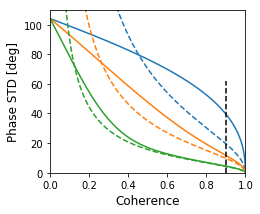

In [25]:
## Fig. S1a - phase STD as a function of coherence

fig, ax = plt.subplots(figsize=[3.5, 3])
Ls = [1, 4, 20]
for i in range(len(Ls)):
    L = Ls[i]
    epsilon = 1e-3
    coh = np.linspace(epsilon, 1.-epsilon, 1000, dtype=np.float64)
    std_ds1 = np.sqrt(ifginv.phase_variance_ds(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.
    std_ps1 = np.sqrt(ifginv.phase_variance_ps(L, coherence=coh, epsilon=epsilon)[0]) / np.pi * 180.

    ax.plot(coh, std_ds1, label='DS', color=pp.mplColors[i])
    ax.plot(coh, std_ps1, '--', label='PS', color=pp.mplColors[i])
ax.plot([0.9, 0.9], [0, 62], 'k--')
ax.set_xlabel('Coherence', fontsize=font_size)
ax.set_ylabel('Phase STD [deg]', fontsize=font_size)
ax.set_xlim([0,1])
ax.set_ylim([0,110])

# output
out_file = os.path.join(work_dir, 'phaseStd_coh.png')
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('saved to file', out_file)
plt.show()